# Dependencies

In [98]:
import numpy as np 
import pandas as pd 
import matplotlib as mlt
import geopandas as gpd
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import plotly
import altair as alt
import bokeh as bok
from matplotlib.animation import FuncAnimation
import plotly.express as px

# Importing Datasets

In [2]:
file_path1 = 'Dataset/File1.csv'
file_path2 = 'Dataset/File2.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\3471375018.py:4: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path1)
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\3471375018.py:5: DtypeWarning: Columns (79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file_path2)


# Pre-processing

In [99]:
combined_data = pd.concat([data1, data2], ignore_index=True)

# Dataset Overview

In [100]:
#Column names
for col in combined_data.columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

# Analysis

#### Attacks Over Time

In [101]:
# Plot points over time worldwide, animation, Bar graph and countries plot
# Number of Causalities overlapping

# Load world map data from Geopandas


# Assuming you have a GeoDataFrame named 'world' containing world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'combined_data' contains your dataset with columns like 'year', 'country', 'latitude', 'longitude'
# Filter the data for each year and plot points on the world map for that year
fig, ax = plt.subplots(figsize=(14, 8))

# Initialize the function for the animation
def animate(year):
    plt.cla()  # Clear axis for new plot
    
    year_data = combined_data[combined_data['iyear'] == year]  # Filter data for the current year
    
    # Create a GeoDataFrame for the points of the current year
    gdf = gpd.GeoDataFrame(year_data, geometry=gpd.points_from_xy(year_data.longitude, year_data.latitude))
    
    world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='blue')  # Plot world boundaries
    ax.axis('off')
    # Plot points for the current year
    gdf.plot(ax=ax, color='red', markersize=3, marker='x', label=str(year), alpha=0.6)
    
    # Set title and legend
    plt.title(f'{year}')
    # plt.legend([f'Year {year}'], loc='upper left')

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=range(1970, 2022), interval=1000)
ani.save('AttacksWorldwide.mp4', writer='ffmpeg', fps=2)  # Save the animation as an MP4 video
plt.close()




C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\3119571838.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\3119571838.py:26: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



#### Attacks By Country

In [112]:
# Group by number of attacks
# Grouping data by 'country' and counting the number of attacks

# Assuming 'world' is a GeoDataFrame with world map data
# Assuming 'attacks_by_country' is a DataFrame with columns 'country' and 'attack_count'

grouped_data = combined_data.groupby(['iyear', 'country_txt']).size().reset_index(name='attack_count')

# Create an empty dictionary to store the attack information
attacks_dict = {}

# Iterate through each row in the grouped data
for index, row in grouped_data.iterrows():
    year = row['iyear']
    country = row['country_txt']
    count = row['attack_count']
    
    # Check if the year exists in the dictionary
    if year not in attacks_dict:
        attacks_dict[year] = {}
    
    # Add country to the dictionary for the specific year
    if country in attacks_dict[year]:
        attacks_dict[year][country] += count
    else:
        attacks_dict[year][country] = count

# Print the generated dictionary
total_attacks_by_country = grouped_data.groupby('country_txt')['attack_count'].sum().reset_index()

# Printing the total attacks by country
print(total_attacks_by_country)

# Assuming you have the world GeoDataFrame already loaded
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# # Merging world map data with total attacks by country
# world = world.merge(total_attacks_by_country, how='left', left_on='name', right_on='country_txt')

# # Plotting the choropleth map without axis and scale
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.set_axis_off()  # Turn off axis
# world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries

# # Plot total attacks by country (use 'attack_count' column)
# world.plot(column='attack_count', ax=ax, legend=True,
#            legend_kwds={'label': None, 'orientation': "vertical"},
#            cmap='YlOrRd', edgecolor='black')  # Choose colormap and edgecolor

# plt.title('Total Attacks by Country Over the Years')
# plt.show()


############### Make interactive map

# usa_attacks = total_attacks_by_country[total_attacks_by_country['country_txt'] == 'United States']

# # Display the total number of attacks in the United States
# print("Total attacks in the United States:", usa_attacks['attack_count'].values[0])

     country_txt  attack_count
0    Afghanistan         20373
1        Albania            83
2        Algeria          2754
3        Andorra             1
4         Angola           501
..           ...           ...
199        Yemen          6317
200   Yugoslavia           203
201        Zaire            50
202       Zambia            63
203     Zimbabwe           106

[204 rows x 2 columns]


#### Major Terrorist Groups (Change position?)

Unique Group Names and Occurrences (>= 1000 attacks excluding 'Unknown'):
gname
Taliban                                             12936
Islamic State of Iraq and the Levant (ISIL)          7479
Shining Path (SL)                                    4567
Al-Shabaab                                           4547
Houthi extremists (Ansar Allah)                      3516
Boko Haram                                           3459
New People's Army (NPA)                              3441
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2612
Revolutionary Armed Forces of Colombia (FARC)        2490
Maoists                                              2164
Communist Party of India - Maoist (CPI-Maoist)       2113
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1842
Liberation Tigers of Tamil Eelam (LTTE)           

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\3799475747.py:17: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



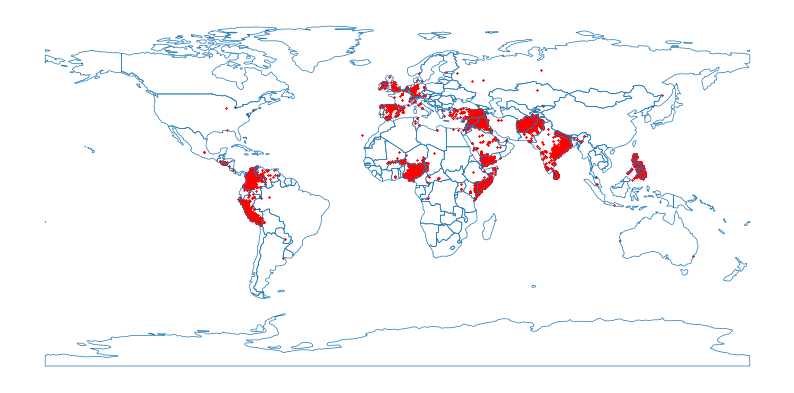

In [120]:
# Find unique group names ('gname') and their occurrences
group_name_counts = combined_data['gname'].value_counts()

# Filter groups with less than 1000 attacks and exclude "Unknown"
filtered_groups = group_name_counts[(group_name_counts >= 1000) & (group_name_counts.index != 'Unknown')]

# Display the filtered group names and their occurrence counts
print("Unique Group Names and Occurrences (>= 1000 attacks excluding 'Unknown'):")
print(filtered_groups)

# Filter the data for groups with >= 1000 attacks and exclude "Unknown"
filtered_data = combined_data[(combined_data['gname'].isin(filtered_groups.index)) & (combined_data['gname'] != 'Unknown')]

# Assuming 'world' is a GeoDataFrame representing world map data
# Replace 'world' with your GeoDataFrame containing world map data
# Load the world map data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame for the filtered attacks using latitude and longitude
geometry = gpd.points_from_xy(filtered_data['longitude'], filtered_data['latitude'])
geo_filtered_attacks = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Plotting the world map and filtered attacks
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axis_off()
world.boundary.plot(ax=ax, linewidth=0.5)
geo_filtered_attacks.plot(ax=ax, marker='x', color='red', markersize=0.5)


plt.show()

#### Top 5 terrorist group and their attacks (Map) [Card of info] (Separate)

gname
Taliban                                        12936
Islamic State of Iraq and the Levant (ISIL)     7479
Shining Path (SL)                               4567
Al-Shabaab                                      4547
Houthi extremists (Ansar Allah)                 3516
Name: count, dtype: int64


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\877330916.py:17: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



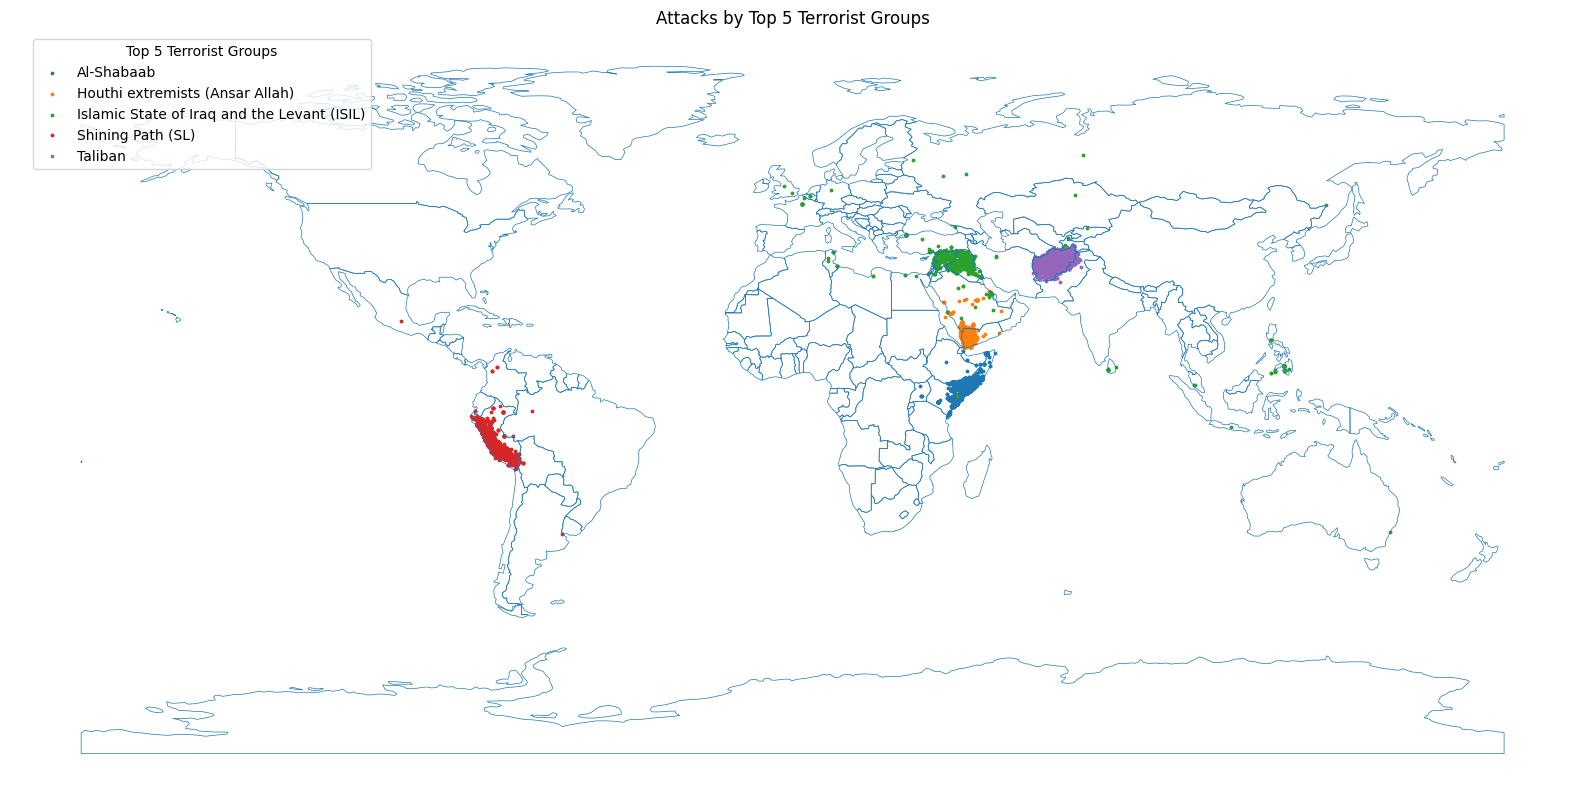

In [122]:
top_groups = group_name_counts[(group_name_counts >= 1000) & (group_name_counts.index != 'Unknown')].head(5)

print(top_groups)


# Filter the data for attacks by the top 5 groups
filtered_data_top_groups = combined_data[combined_data['gname'].isin(top_groups.index)]

# Create a dictionary to store attack locations by group name
attack_locations_by_group = {}

# Populate the dictionary with attack locations for each group
for group, data in filtered_data_top_groups.groupby('gname'):
    attack_locations_by_group[group] = list(zip(data['latitude'], data['longitude']))

# Load world map data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(16, 8))
world.boundary.plot(ax=ax, linewidth=0.5)

# Plotting attacks color-coded for each group
for group, locations in attack_locations_by_group.items():
    latitudes, longitudes = zip(*locations)
    ax.scatter(longitudes, latitudes, label=group, s=3)

# Remove axis and display a legend/key for the groups (placing legend outside the plot)
ax.axis('off')
plt.legend(title='Top 5 Terrorist Groups', bbox_to_anchor=(.01, 1), loc='upper left')
plt.title('Attacks by Top 5 Terrorist Groups')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

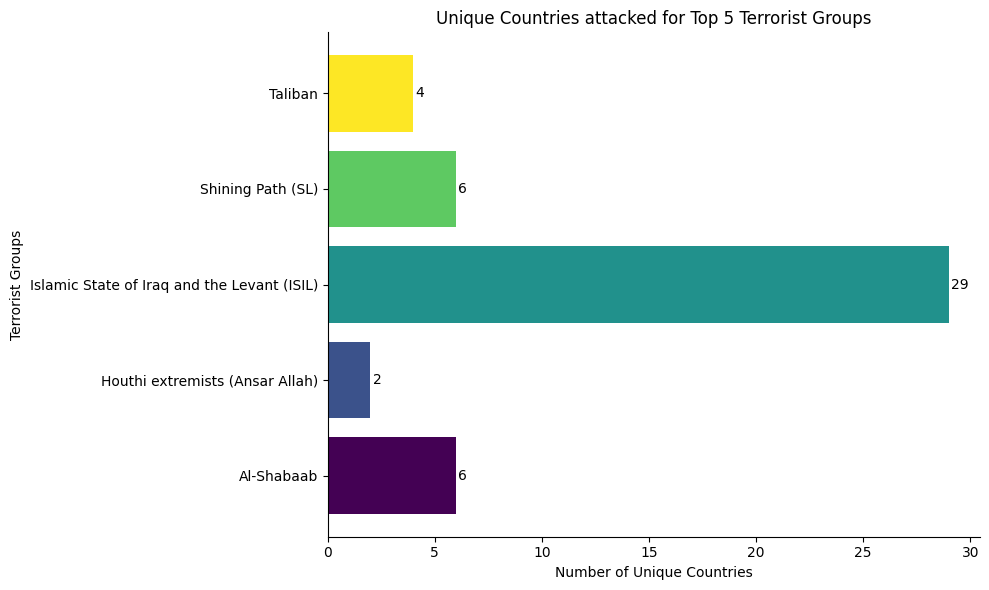

In [123]:

# Filter the data for attacks by the top 5 groups
filtered_data_top_groups = combined_data[combined_data['gname'].isin(top_groups.index)]

# Create a dictionary to store unique countries for each group
unique_countries_by_group = {}

# Populate the dictionary with unique country names for each group
for group, data in filtered_data_top_groups.groupby('gname'):
    unique_countries_by_group[group] = data['country_txt'].unique()


# Extracting group names and corresponding counts
import matplotlib.pyplot as plt

# Assuming 'unique_countries_by_group' contains the dictionary of unique countries for each group

# Extracting group names and corresponding counts
groups = list(unique_countries_by_group.keys())
counts = [len(countries) for countries in unique_countries_by_group.values()]

# Creating a color palette using Matplotlib's colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))  # Use 'viridis' colormap for a gradient of colors

# Plotting the bar plot with enhanced styling
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(groups, counts, color=colors)

# Adding labels and titles
plt.xlabel('Number of Unique Countries')
plt.ylabel('Terrorist Groups')
plt.title('Unique Countries attacked for Top 5 Terrorist Groups')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)  # Remove grid lines
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['top'].set_visible(False)  # Hide top spine

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{counts[i]}', ha='left', va='center')

plt.tight_layout()
plt.show()

#### Attacks by country (Top 10)

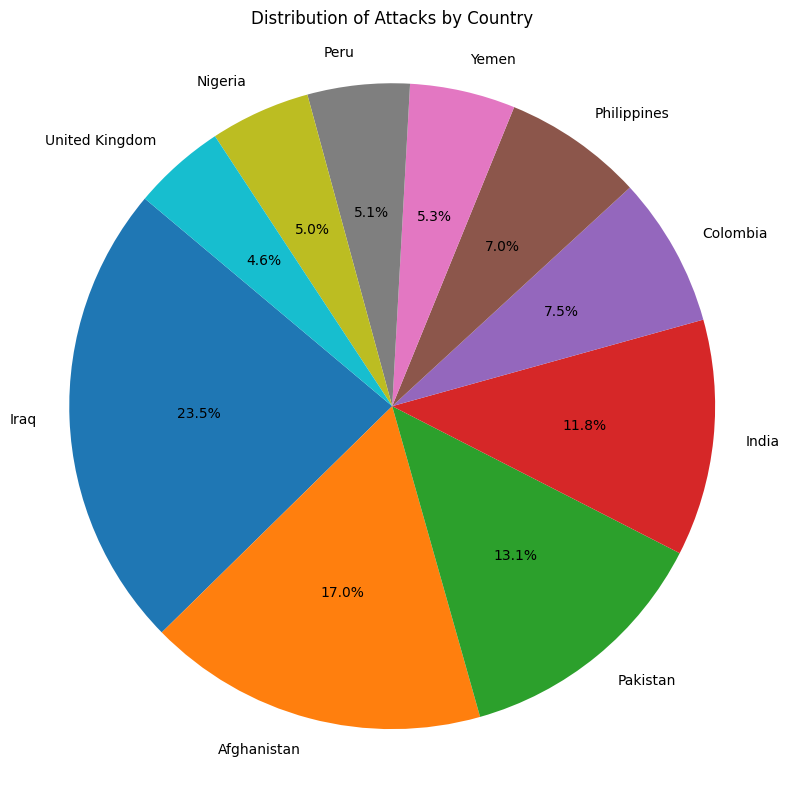

In [33]:
# Assuming you have a DataFrame named 'attacks_by_country' with columns 'country_txt' and 'attack_count'
#IMPROVE
# Grouping data by 'country_txt' and summing up the attacks count for each country
attacks_by_country = combined_data.groupby('country_txt').size().reset_index(name='attack_count')

# Sorting data by attack count in descending order
attacks_by_country = attacks_by_country.sort_values('attack_count', ascending=False)

# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries['attack_count'], labels=top_countries['country_txt'], autopct='%1.1f%%', startangle=140)


# Adding title
plt.title('Distribution of Attacks by Country')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Assuming 'attacks_by_country' contains the attack count for each country
# Calculate the total number of terrorist events
total_events = attacks_by_country['attack_count'].sum()

# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Calculate the percentage of events for each of the top 10 countries
top_countries['percentage'] = (top_countries['attack_count'] / total_events) * 100

# Display the total number of terrorist events
print(f"Total number of terrorist events: {total_events}")

# Display the top 10 countries and their respective percentages
print("Top 10 countries and their percentage of events:")
print(top_countries[['country_txt', 'attack_count', 'percentage']])

Total number of terrorist events: 214666
Top 10 countries and their percentage of events:
        country_txt  attack_count  percentage
84             Iraq         28068   13.075196
0       Afghanistan         20373    9.490557
134        Pakistan         15654    7.292259
80            India         14164    6.598157
35         Colombia          8991    4.188367
140     Philippines          8375    3.901410
199           Yemen          6317    2.942711
139            Peru          6116    2.849077
130         Nigeria          5998    2.794108
187  United Kingdom          5553    2.586809


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\1413339977.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
import plotly.graph_objects as go

# Assuming 'attacks_by_country' contains the attack count for each country
# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Define source, target, and value for the Sankey diagram
source = [0] * len(top_countries)  # Source is always 0 for each country
target = list(range(1, len(top_countries) + 1))  # Target indices for each country
value = top_countries['attack_count'].tolist()  # Values for attack counts

# Define labels for countries
labels = ['World'] + top_countries['country_txt'].tolist()

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

# Update layout
fig.update_layout(
    title='Flow of Terrorist Events among Top 10 Countries',
    font=dict(size=12),
)

# Show the Sankey diagram
fig.show()


In [49]:
import plotly.graph_objects as go

# Assuming 'attacks_by_country' contains the attack count for each country
# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Sum of attack counts for the top 10 countries
top_10_sum = top_countries['attack_count'].sum()

# Get total attack count
total_attacks = attacks_by_country['attack_count'].sum()

# Calculate the 'Other' category count
other_count = total_attacks - top_10_sum

# Define source, target, and value for the Sankey diagram
source = [0] * (len(top_countries) + 1)  # Source is 0 for top countries and 0 for 'Other'
target = list(range(1, len(top_countries) + 1)) + [len(top_countries) + 1]  # Target indices for each country and 'Other'
value = top_countries['attack_count'].tolist() + [other_count]  # Values for attack counts and 'Other'

# Define labels for countries and 'Other'
labels = ['World'] + top_countries['country_txt'].tolist() + ['Other']

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=50,
        line=dict(color='black', width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

# Update layout
fig.update_layout(
    title='Flow of Terrorist Events among Top 10 Countries and Other',
    font=dict(size=13),
)

# Show the Sankey diagram
fig.show()

In [125]:


# Replace this part with your actual data
data = {
    'Target Type': ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 
                    'Facility/Infrastructure', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)', 'Hijacking'],
    'Count': [99986, 50845, 21989, 14493, 12606, 1257, 1172, 773]
}

df = pd.DataFrame(data)

# Create the treemap with a lighter color scale
fig = px.treemap(df, path=['Target Type'], values='Count', color='Count', hover_data=['Count'], color_continuous_scale='Mint')

# Update layout to set a lighter color scale and align title to the left
fig.update_layout(
    title='Treemap of Target Types',
    font=dict(size=20),  # Font size
    width=1000,  # Width of the chart
    height=1000,  # Height of the chart
    title_x=0.5  # Adjust title alignment to the center (value between 0 and 1)
)

# Centralize cell titles
fig.update_traces(textfont=dict(size=30, color='WHite', family='Calibri'), selector=dict(type='treemap'))

fig.show()


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_12320\1769549468.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


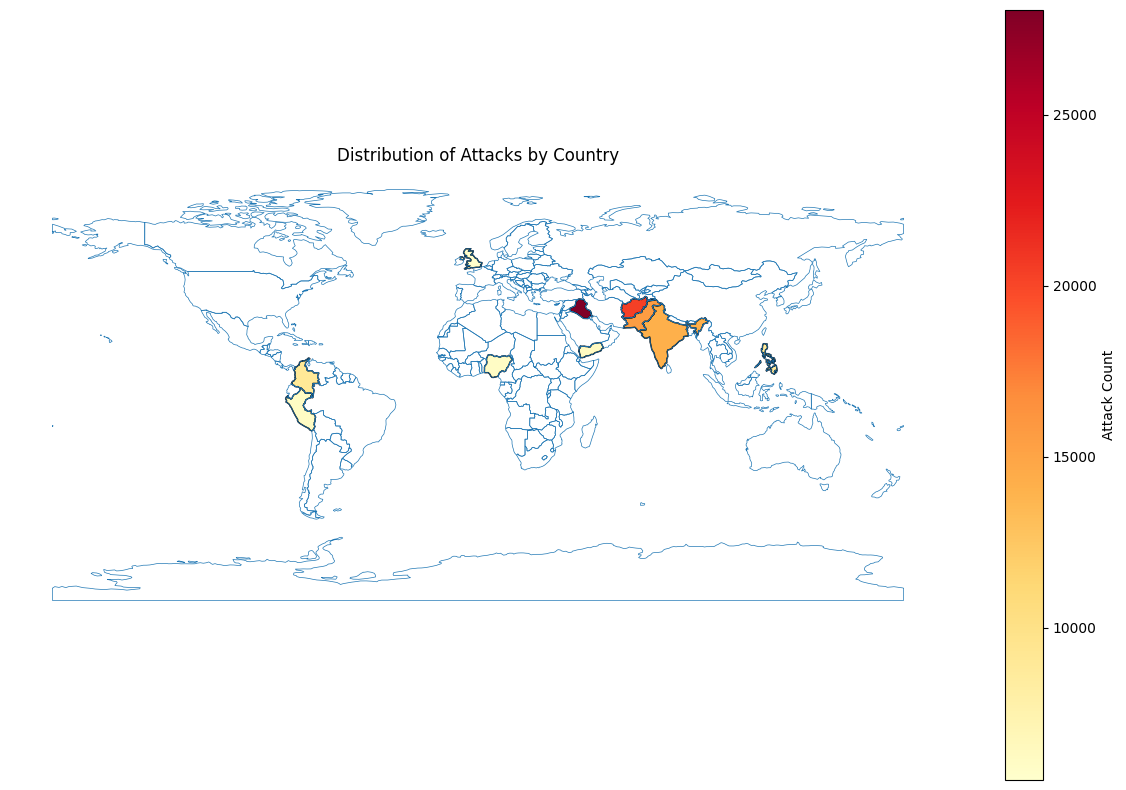

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'attacks_by_country' DataFrame contains columns 'country_txt' and 'attack_count'
# Grouping data by 'country_txt' and summing up the attacks count for each country
attacks_by_country = combined_data.groupby('country_txt').size().reset_index(name='attack_count')

# Sorting data by attack count in descending order
attacks_by_country = attacks_by_country.sort_values('attack_count', ascending=False)

# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Load world map data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with the attack counts by country
world = world.merge(top_countries, how='left', left_on='name', right_on='country_txt')

# Plotting choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries

# Plotting choropleth map using attack count
world.plot(column='attack_count', ax=ax, legend=True,
           legend_kwds={'label': "Attack Count", 'orientation': "vertical"},
           cmap='YlOrRd', edgecolor='black')  # Choose colormap and edgecolor

# Adding title
plt.title('Distribution of Attacks by Country')

plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()


#### Cities with Most Attacks (Top 10)

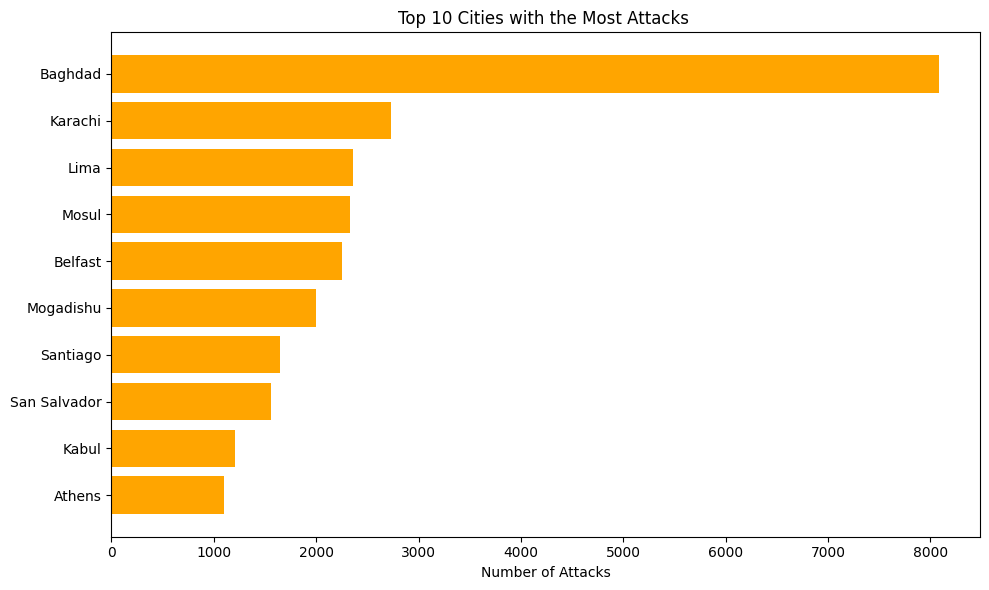

In [108]:

# Filtering out 'Unknown' values from the 'city' column
filtered_data = combined_data[combined_data['city'] != 'Unknown']

# Grouping filtered data by 'city' and counting the occurrences of attacks in each city
attacks_by_city = filtered_data['city'].value_counts().reset_index()
attacks_by_city.columns = ['City', 'Attack Count']

# Selecting the top 10 cities with the most attacks
top_cities_attacks = attacks_by_city.head(10)

# Plotting a bar chart for the top 10 cities
plt.figure(figsize=(10, 6))
plt.barh(top_cities_attacks['City'], top_cities_attacks['Attack Count'], color='orange')
plt.xlabel('Number of Attacks')
plt.title('Top 10 Cities with the Most Attacks ')

plt.gca().invert_yaxis()  # Invert y-axis to display the cities with the highest attacks at the top
plt.tight_layout()
plt.show()

#### Cities with Most Deaths (Top 10)

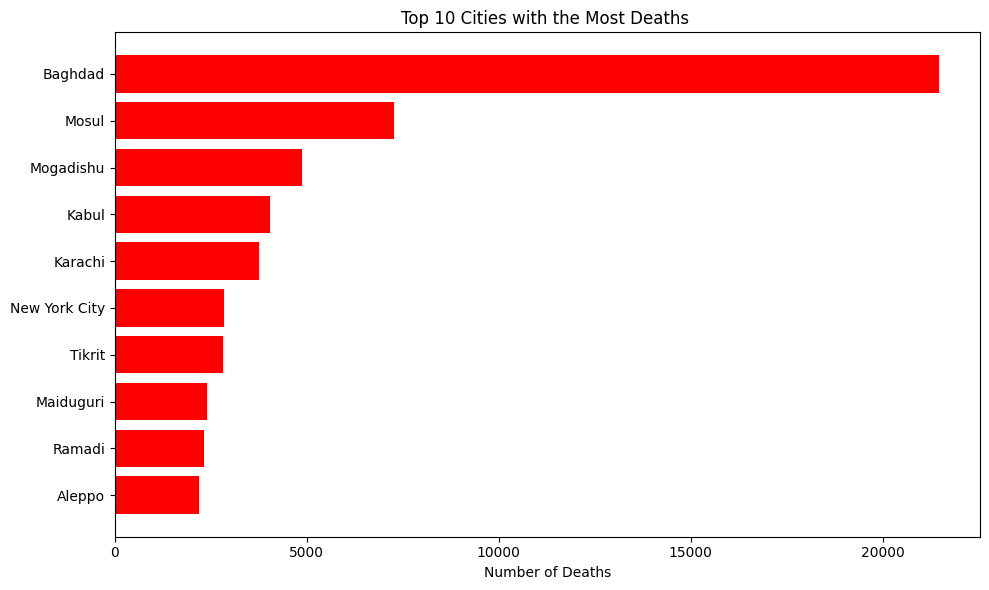

In [109]:

# Assuming you have a DataFrame named 'combined_data' with a column named 'city' indicating city names
# and a column named 'nkill' indicating the number of deaths

# Filtering out 'Unknown' values from the 'city' column
filtered_data = combined_data[combined_data['city'] != 'Unknown']

# Grouping filtered data by 'city' and summing the number of deaths in each city
deaths_by_city = filtered_data.groupby('city')['nkill'].sum().reset_index()

# Sorting the cities based on total deaths
deaths_by_city_sorted = deaths_by_city.sort_values(by='nkill', ascending=False)

# Selecting the top 10 cities with the most deaths
top_cities_deaths = deaths_by_city_sorted.head(10)

# Plotting a bar chart for the top 10 cities with the most deaths
plt.figure(figsize=(10, 6))
plt.barh(top_cities_deaths['city'], top_cities_deaths['nkill'], color='red')
plt.xlabel('Number of Deaths')
plt.title('Top 10 Cities with the Most Deaths ')

plt.gca().invert_yaxis()  # Invert y-axis to display the cities with the highest deaths at the top
plt.tight_layout()
plt.show()

#### Types Of Terror Attacks

In [4]:
# Filter the data to exclude rows with unknown attack types
known_attacks = combined_data[combined_data['attacktype1_txt'] != 'Unknown']

# Get the count of known attack types
known_attack_counts = known_attacks['attacktype1_txt'].value_counts()

# Display the counts of known attack types
print(known_attack_counts)

attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64


In [18]:
import altair as alt
import pandas as pd

# Replace this part with your known_attack_counts data
data = {
    'Attack Type': ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)','Hijacking'],
    'Count': [99986, 50845, 21989, 14493, 12606, 1257, 1172, 773]
}

df = pd.DataFrame(data)

custom_colors = alt.Scale(
    domain=['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)','Hijacking'],
    range=['#D10000', '#005030', '#EDBE00', '#545454', '#0097B2', '#8C52FF', '#1C006D', '#FF9A00']  # Custom colors in hexadecimal format
)

# Create Altair bar chart
bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('Attack Type', sort=None, axis=alt.Axis(labelAngle=-45)),
    y='Count',
    color=alt.Color('Attack Type', legend=None),
    tooltip=['Attack Type', 'Count']
).properties(
    width=600,
    height=400,
    title=''
).configure_view(
    strokeOpacity=0  # Remove chart border lines
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

bars


alt.Chart(...)

In [5]:
event = combined_data['eventid'].unique()

attack_types_by_event = {}

# Loop through unique event IDs
for event_id in combined_data['eventid'].unique():
    # Filter data for the specific event ID
    event_data = combined_data[combined_data['eventid'] == event_id]
    
    # Get attack types for the event and append them to a list
    attack_types = event_data['attacktype1_txt'].unique().tolist()
    attack_types.extend(event_data['attacktype2_txt'].unique().tolist())
    
    # Remove any 'nan' values
    attack_types = [x for x in attack_types if str(x) != 'nan']
    
    # Store attack types in the dictionary with event ID as key
    attack_types_by_event[event_id] = attack_types

# Displaying the dictionary containing attack types for each event ID
print(attack_types_by_event)

KeyboardInterrupt: 

## Targets Hit

In [17]:
target_names = combined_data['targtype1_txt'].unique()
target_secondary= combined_data['targsubtype1_txt'].unique()


target_name_counts = combined_data['targtype1_txt'].value_counts()
target_secondary_name_counts = combined_data['targsubtype1_txt'].value_counts()
print(target_names)
print(group_name_counts)
print(target_secondary)
print(target_secondary_name_counts)

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
gname
Unknown                                              93675
Taliban                                              12936
Islamic State of Iraq and the Levant (ISIL)           7479
Shining Path (SL)                                     4567
Al-Shabaab                                            4547
                                                     ...  
Dissident Military Mmbrs of Northern Tribal Group        1
War Veterans                                             1
Boz-Ok (Grey Arrow)                                      1
Revolutionary Bolivariano Movement 200          

#### Targets Hit (Military + Police vs Civilians)

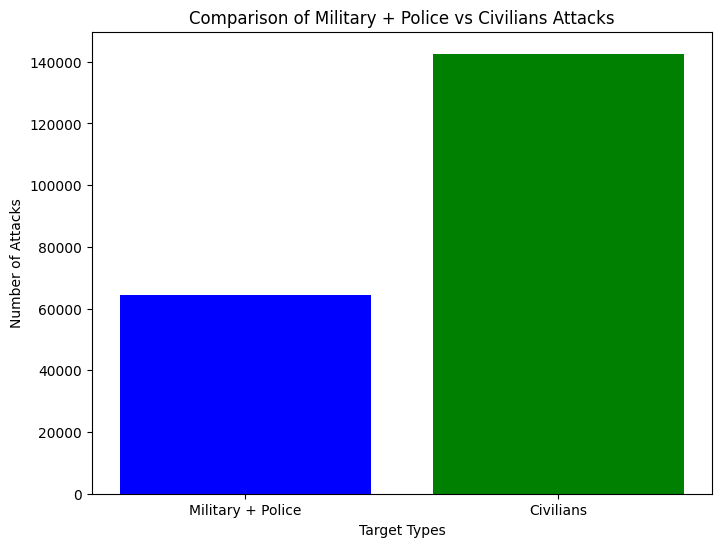

In [19]:

# Filter data for Military + Police and Civilians attacks
military_police_attacks = combined_data[combined_data['targtype1_txt'].isin(['Military', 'Police'])]
civilian_attacks = combined_data[combined_data['targtype1_txt'].isin(['Private Citizens & Property', 'Government (Diplomatic)','Journalists & Media','Utilities', 'Government (General)', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Violent Political Party', 'Religious Figures/Institutions', 'Transportation', 'Tourists','NGO', 'Telecommunication', 'Food or Water Supply', 'Terrorists/Non-State Militia', 'Maritime', 'Abortion Related'])]

# Get the counts for each category
military_police_counts = military_police_attacks.shape[0]
civilian_counts = civilian_attacks.shape[0]

# Plotting the bar graph
categories = ['Military + Police', 'Civilians']
counts = [military_police_counts, civilian_counts]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.title('Comparison of Military + Police vs Civilians Attacks')
plt.show()

In [126]:
# Filter data for Military + Police and Civilians attacks
military_police_attacks = combined_data[combined_data['targtype1_txt'].isin(['Military', 'Police'])]
civilian_attacks = combined_data[combined_data['targtype1_txt'].isin(['Private Citizens & Property', 'Government (Diplomatic)','Journalists & Media','Utilities', 'Government (General)', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Violent Political Party', 'Religious Figures/Institutions', 'Transportation', 'Tourists','NGO', 'Telecommunication', 'Food or Water Supply', 'Terrorists/Non-State Militia', 'Maritime', 'Abortion Related'])]

# Get the counts for each category
military_police_counts = military_police_attacks.shape[0]
civilian_counts = civilian_attacks.shape[0]

# Create a DataFrame for the pie chart
data = {
    'Target Types': ['Military and Police', 'Civilians'],
    'Number of Attacks': [military_police_counts, civilian_counts]
}

df = pd.DataFrame(data)

# Create a pie chart using Plotly Express
fig = px.pie(df, values='Number of Attacks', names='Target Types', 
             color=['blue', 'red'],  # Specify colors for each category
             title='Comparison of Military + Police vs Civilians Attacks')

fig.show()

#### Targets Hit (Others)

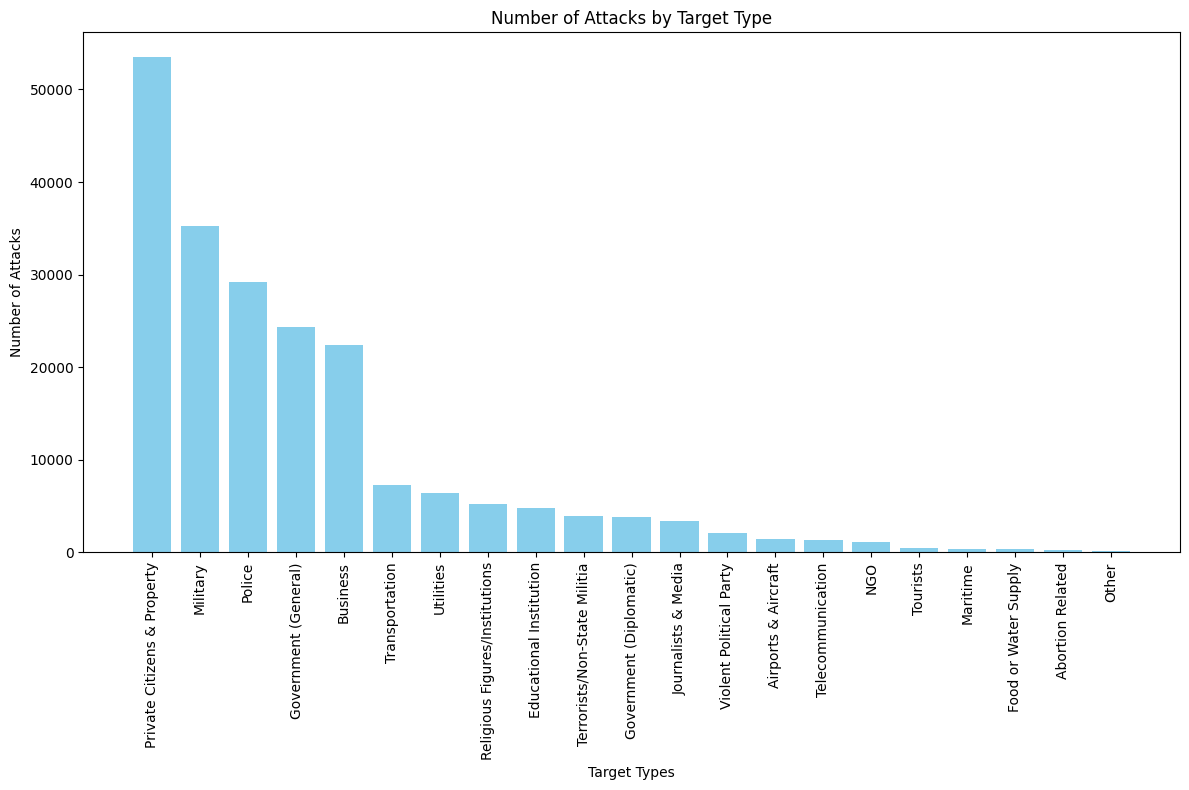

In [19]:
#MODIFY THIS

# Get unique target types
target_types = combined_data['targtype1_txt'].unique()

# Create an empty dictionary to store attack counts for each target type
target_attacks_count = {}

# Count attacks for each target type
for target in target_types:
    target_attacks_count[target] = combined_data[combined_data['targtype1_txt'] == target].shape[0]

# Remove 'Unknown' if present
if 'Unknown' in target_attacks_count:
    target_attacks_count.pop('Unknown')

# Sorting the dictionary by attack counts
sorted_targets = dict(sorted(target_attacks_count.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_targets.keys(), sorted_targets.values(), color='skyblue')
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Target Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import altair as alt

# Assuming 'combined_data' is the DataFrame containing the data

# Get unique target types
target_types = combined_data['targtype1_txt'].unique()

# Create an empty list to store dictionaries with attack counts for each target type
data = []

# Count attacks for each target type
for target in target_types:
    if target != 'Unknown':  # Exclude 'Unknown' target types
        count = combined_data[combined_data['targtype1_txt'] == target].shape[0]
        data.append({'Target Type': target, 'Number of Attacks': count})

# Create a DataFrame from the list of dictionaries
data_df = pd.DataFrame(data)

# Sorting the DataFrame by the number of attacks
data_df = data_df.sort_values('Number of Attacks', ascending=False)

# Plotting the bar chart using Altair
bars = alt.Chart(data_df).mark_bar().encode(
    x=alt.X('Number of Attacks', axis=alt.Axis(title='Number of Attacks')),
    y=alt.Y('Target Type', axis=alt.Axis(title='Target Types'), sort='-x'),
    color=alt.Color('Target Type', legend=None),
    tooltip=['Target Type', 'Number of Attacks']
).properties(
    width=600,
    height=400,
    title='Number of Attacks by Target Type'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    labelAngle=0  # Rotate the labels on the x-axis to 0 degrees
)

bars


alt.Chart(...)

#### War overlap with terrorist attacks (Matplotlib animation)


In [28]:
war_dict = {
    "Sino-Vietnamese War": ["1979-1991", ["China", "Vietnam"]],
    "Cambodian War": ["1978-1991", ["Vietnam", "Cambodia"]],
    "Ugandan-Tanzanian War": ["1978-1979", ["Uganda", "Tanzania"]],
    "Ogaden War": ["1977-1978", ["Ethiopia", "Somalia"]],
    "First Angolan Civil War": ["1975-1991", ["Angola", "Portugal", "South Africa", "Cuba", "United States"]],
    "Cyprus War": ["1974", ["Greece", "Turkey"]],
    "October War": ["1973", ["Egypt", "Syria", "Iraq", "Israel"]],
    "Bangladeshi War of Independence": ["1971", ["East Pakistan", "West Pakistan", "India"]],
    "Toyota War": ["1987", ["Chad", "Libya"]],
    "Lebanon War": ["1982-1985", ["Israel", "Lebanon"]],
    "Falkland Islands War": ["1982", ["Argentina", "United Kingdom"]],
    "Iran-Iraq War": ["1980-1988", ["Iran", "Iraq"]],
    "Eritrean-Ethiopian Border War": ["1998-2000", ["Eritrea", "Ethiopia"]],
    "Kosovar War of Independence": ["1998-1999", ["Kosovo Liberation Army", "Serbia"]],
    "Cenepa Valley War": ["1995", ["Ecuador", "Peru"]],
    "Bosnian-Herzegovinian War of Independence": ["1992-1995", ["Bosnia and Herzegovina", "Republic of Srpska", "Croatia", "Serbia and Montenegro"]],
    "Armenian-Azerbaijani War": ["1991-1994", ["Armenia", "Azerbaijan"]],
    "Persian Gulf War": ["1990-1991", ["Iraq", "Kuwait", "United States", "Saudi Arabia", "Egypt", "Syria", "France", "United Kingdom", "Canada", "Italy"]]
}

war_dict_2000 = {
    "Afghanistan War": ["2001-2021", ["United States", "Afghanistan"]],
    "Iraq War": ["2003-2011", ["United States", "Iraq"]],
    "Syrian Civil War": ["2011-2022", ["Syria", "United States"]],
    "Yemeni Civil War": ["2014-2022", ["Yemen", "Saudi Arabia", "UAE", "Qatar", "Sudan", "Senegal", "Morocco"]],
    "South Sudan Civil War": ["2013-2022", ["South Sudan"]],
}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'combined_data' contains your dataset with columns like 'iyear', 'country', 'latitude', 'longitude'
# and 'war_dict', 'war_dict_2000' containing war information

# Define a function to plot both terrorist attacks and countries involved in wars for a specific year
def plot_attacks_and_wars(year, ax):
    ax.clear()  # Clear axis for new plot
    world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries
    
    # Plot countries involved in wars for the current year
    countries = []
    for war in war_dict.values():
        war_years = war[0].split('-')
        if len(war_years) == 2 and int(war_years[0]) <= year <= int(war_years[1]):
            countries.extend(war[1])
    for war in war_dict_2000.values():
        war_years = war[0].split('-')
        if len(war_years) == 2 and int(war_years[0]) <= year <= int(war_years[1]):
            countries.extend(war[1])
    
    # Highlight countries involved in wars for the current year
    if countries:
        world[world['name'].isin(countries)].plot(ax=ax, color='grey', edgecolor='black')
    
    # Filter terrorist attack data for the current year
    year_data = combined_data[combined_data['iyear'] == year]
    if not year_data.empty:
        # Create a GeoDataFrame for the points of the current year
        gdf = gpd.GeoDataFrame(year_data, geometry=gpd.points_from_xy(year_data.longitude, year_data.latitude))
        ax.axis('off')
        # Plot terrorist attack points for the current year
        gdf.plot(ax=ax, color='red', markersize=1, marker='x', label=f'Attacks {year}', alpha=0.6)
    
    # Set title and legend
    plt.title(f'Terrorist Events and Wars ({year})')
    

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create the animation
ani = animation.FuncAnimation(fig, plot_attacks_and_wars, frames=range(1970, 2022), interval=1000, fargs=[ax])
ani.save('AttacksAndWarsWorldwide.mp4', writer='ffmpeg', fps=2)  # Save the animation as an MP4 video
plt.close()

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_24944\1388829028.py:30: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:
# Initialize a dictionary to store the number of attacks for each country at war
attacks_in_wartime = {}

# Loop through each year from 1970 to 2022
for year in range(1970, 2023):
    # Filter data for the current year
    year_data = combined_data[combined_data['iyear'] == year]
    
    # Iterate through each war in the war_dict and war_dict_2000
    for war in war_dict.values():
        war_years = war[0].split('-')
        if len(war_years) >= 2 and int(war_years[0]) <= year <= int(war_years[1]):
            countries = war[1]
            for country in countries:
                # Count the number of attacks for each country at war
                attacks_count = len(year_data[year_data['country'] == country])
                
                # Store the count in the dictionary
                if country in attacks_in_wartime:
                    attacks_in_wartime[country] += attacks_count
                else:
                    attacks_in_wartime[country] = attacks_count

    for war in war_dict_2000.values():
        war_years = war[0].split('-')
        if len(war_years) >= 2 and int(war_years[0]) <= year <= int(war_years[1]):
            countries = war[1]
            for country in countries:
                # Count the number of attacks for each country at war
                attacks_count = len(year_data[year_data['country'] == country])
                
                # Store the count in the dictionary
                if country in attacks_in_wartime:
                    attacks_in_wartime[country] += attacks_count
                else:
                    attacks_in_wartime[country] = attacks_count

# Display the dictionary containing the number of attacks for each country at war

#Add war terror overlap
# war_dict_tuples = {key: (value[0], tuple(value[1])) for key, value in war_dict.items()}
# attacks_in_wartime_tuples = {key: value for key, value in attacks_in_wartime.items()}

# # Find countries with zero attacks during wartime
# countries_with_zero_attacks = {
#     country: 0 for country, war_info in war_dict_tuples.items() if war_info not in attacks_in_wartime_tuples.values()
# }

# print(countries_with_zero_attacks)
# print(attacks_in_wartime)

# print(attacks_in_wartime)

#### Killings over 1000, attacks + Reasoning, Actions taken


In [ ]:
#Canva

killings_over_1000 = combined_data[combined_data['nkill'] > 1000]

# Filter incidents where 'motive' is not null and 'claimmode_txt' is not null
incidents_filtered = killings_over_1000[
    (killings_over_1000['motive'].notnull()) &
    (killings_over_1000['claimmode_txt'].notnull())
]

# Retrieve only the Event IDs from the filtered dataset
event_ids_filtered = incidents_filtered['eventid'].tolist()

# Display the list of Event IDs
print(event_ids_filtered)

[200109110004, 200109110005, 201406150063]


In [ ]:
killings_over_500 = combined_data[combined_data['nkill'] > 500]

# Filter incidents where 'motive' is not null and 'claimmode_txt' is not null
incidents_filtered = killings_over_500[
    (killings_over_500['motive'].notnull()) &
    (killings_over_500['claimmode_txt'].notnull())
]

# Retrieve only the Event IDs from the filtered dataset
event_ids_filtered = incidents_filtered['eventid'].tolist()

# Display the list of Event IDs
print(event_ids_filtered)

[200109110004, 200109110005, 201406100042, 201406150063, 201408200027, 201710140002]


In [ ]:
killings_over_500 = combined_data[combined_data['nkill'] > 500]

# Filter incidents where 'motive' is not null and 'claimmode_txt' is not null
incidents_filtered = killings_over_500[
    (killings_over_500['motive'].notnull()) &
    (killings_over_500['claimmode_txt'].notnull())
]

# Retrieve only the Event IDs from the filtered dataset
event_ids_filtered = incidents_filtered['eventid'].tolist()

# Display the list of Event IDs
print(event_ids_filtered) 

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_26596\2709808129.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_in_bins = combined_data.groupby(pd.cut(combined_data['nkill'], bins=bins)).size()


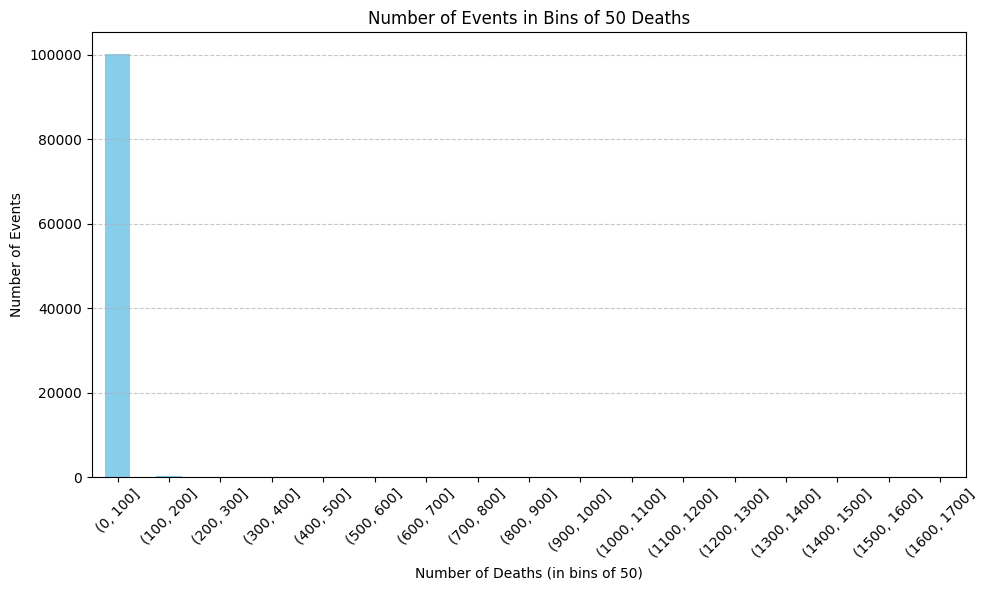

In [ ]:
#########################FIX IT############################

# Define the bin size
bin_size = 100

# Calculate the maximum number of deaths to determine the range for bins
max_deaths = int(combined_data['nkill'].max())  # Convert max_deaths to an integer

# Create bins using numpy's arange function
bins = range(0, max_deaths + bin_size, bin_size)

# Group events based on the number of deaths using cut and count them
events_in_bins = combined_data.groupby(pd.cut(combined_data['nkill'], bins=bins)).size()

# Plotting the grouped events in bins
plt.figure(figsize=(10, 6))
events_in_bins.plot(kind='bar', color='skyblue')
plt.title('Number of Events in Bins of 50 Deaths')
plt.xlabel('Number of Deaths (in bins of 50)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Suicide Attacks


In [ ]:
# Fill missing values in the 'summary' column with an empty string
combined_data['summary'].fillna('', inplace=True)

# Filter the dataset for rows where the 'summary' column contains the word 'suicide'
suicide_attacks = combined_data[combined_data['summary'].str.contains('suicide', case=False)]

# Display information about the suicide attacks
print(suicide_attacks)

             eventid  iyear  imonth  iday approxdate  extended resolution  \
1261    197205050001   1972       3    15        NaN         0        NaN   
17424   198211110015   1982      11    11        NaN         0        NaN   
24741   198504090006   1985       4     9        NaN         0        NaN   
48576   199110160024   1991      10    16        NaN         0        NaN   
61093   199512110017   1995      11    11        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
214335  202106180017   2021       6    18        NaN         0        NaN   
214423  202106210012   2021       6    21        NaN         0        NaN   
214565  202106270014   2021       6    27        NaN         0        NaN   
214566  202106270016   2021       6    25        NaN         0        NaN   
214649  202106300004   2021       6    30        NaN         0        NaN   

        country    country_txt  region  ...  \
1261         98          Ita

In [ ]:
References

NameError: name 'References' is not defined